In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, KernelCenterer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.utils import extmath
from sklearn.metrics.pairwise import euclidean_distances

In [13]:
def my_pca(X, n_components=2):

    # Presprocessing - Standard Scaler
    X_std = StandardScaler().fit_transform(X)

    #Calculate covariance matrix
    cov_mat = np.cov(X_std.T)

    # Get eigenvalues and eigenvectors
    eig_vals, eig_vecs = np.linalg.eigh(cov_mat)

    # flip eigenvectors' sign to enforce deterministic output
    eig_vecs, _ = extmath.svd_flip(eig_vecs, np.empty_like(eig_vecs).T)

    # Concatenate the eigenvectors corresponding to the highest n_components eigenvalues
    matrix_w = np.column_stack([eig_vecs[:,-i] for i in range(1,n_components+1)])

    # Get the PCA reduced data
    Xpca = X_std.dot(matrix_w)

    return Xpca

In [14]:
data = pd.read_csv('./data/plums.csv')
print("data.shape: ", data.shape)
X = data.values[:,1:]   # remove the index number column
print("X.shape: ", X.shape)
Xstd = StandardScaler().fit_transform(X)  # normalizing X
print("Xstd.shape: ", Xstd.shape)

data.shape:  (40, 601)
X.shape:  (40, 600)
Xstd.shape:  (40, 600)


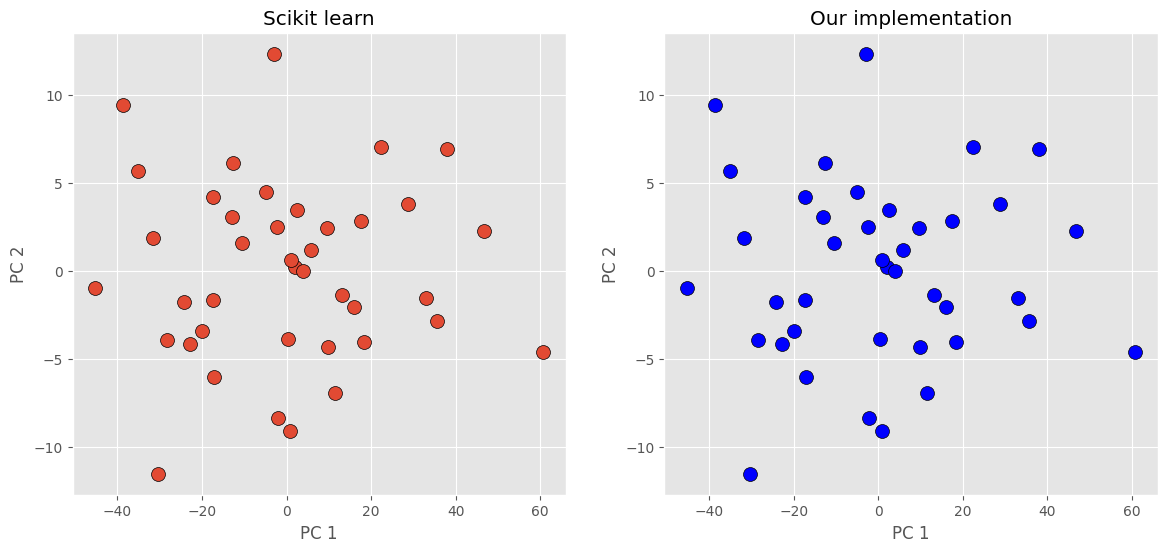

In [25]:
# Scikit-learn PCA
pca1 = PCA(n_components=2)
Xpca1 = pca1.fit_transform(Xstd)

# Our implementation
Xpca2 = my_pca(X, n_components=2)

with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    #plt.figure(figsize=(8,6))
    ax[0].scatter(Xpca1[:,0], Xpca1[:,1], s=100, edgecolors='k')
    ax[0].set_xlabel('PC 1')
    ax[0].set_ylabel('PC 2')
    ax[0].set_title('Scikit learn')

    ax[1].scatter(Xpca2[:,0], Xpca2[:,1], s=100, facecolor = 'b', edgecolors='k')
    ax[1].set_xlabel('PC 1')
    ax[1].set_ylabel('PC 2')
    ax[1].set_title('Our implementation')
    plt.show()

### a smiplified pca function

In [27]:
# without check sign of eigen vector matrix
def my_pca_simp(X, n_components=2):

    # Presprocessing - Standard Scaler
    X_std = StandardScaler().fit_transform(X)

    #Calculate covariance matrix
    cov_mat = np.cov(X_std.T)

    # Get eigenvalues and eigenvectors
    eig_vals, eig_vecs = np.linalg.eigh(cov_mat)

    # flip eigenvectors' sign to enforce deterministic output
    # eig_vecs, _ = extmath.svd_flip(eig_vecs, np.empty_like(eig_vecs).T)

    # Concatenate the eigenvectors corresponding to the highest n_components eigenvalues
    matrix_w = np.column_stack([eig_vecs[:,-i] for i in range(1,n_components+1)])

    # Get the PCA reduced data
    Xpca = X_std.dot(matrix_w)

    return Xpca

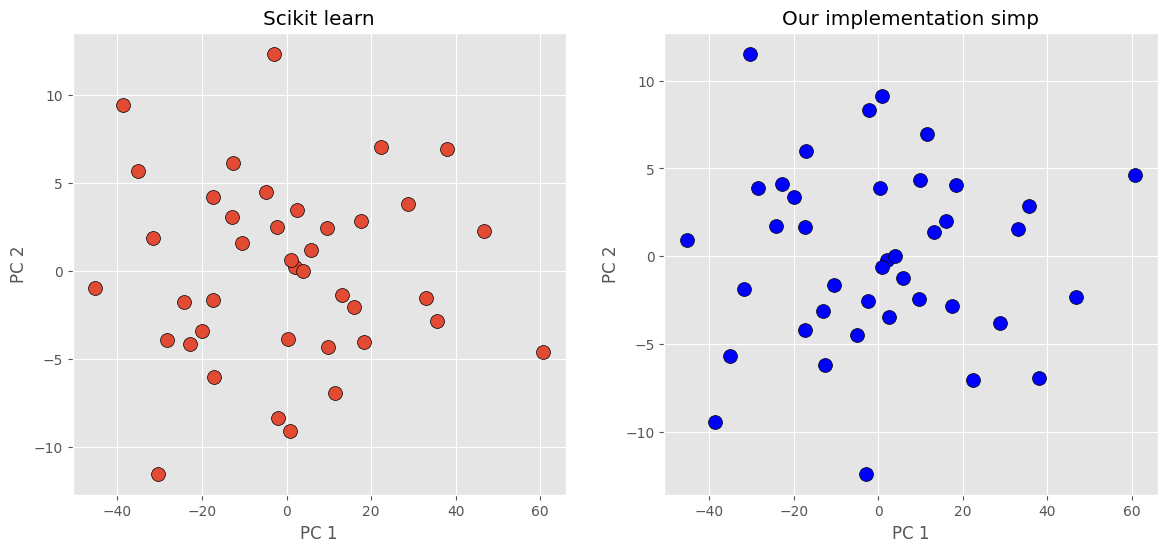

In [28]:
# Scikit-learn PCA
pca1 = PCA(n_components=2)
Xpca1 = pca1.fit_transform(Xstd)

# Our implementation
Xpca2 = my_pca_simp(X, n_components=2)

with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    #plt.figure(figsize=(8,6))
    ax[0].scatter(Xpca1[:,0], Xpca1[:,1], s=100, edgecolors='k')
    ax[0].set_xlabel('PC 1')
    ax[0].set_ylabel('PC 2')
    ax[0].set_title('Scikit learn')

    ax[1].scatter(Xpca2[:,0], Xpca2[:,1], s=100, facecolor = 'b', edgecolors='k')
    ax[1].set_xlabel('PC 1')
    ax[1].set_ylabel('PC 2')
    ax[1].set_title('Our implementation simp')
    plt.show()

### kernel pca

In [16]:
def my_ker_pca(X, n_components=3, gamma = 0.01):

    # Calculate euclidean distances of each pair of points in the data set
    dist = euclidean_distances(X, X, squared=True)

    # Calculate Kernel matrix
    K = np.exp(-gamma * dist)
    Kc = KernelCenterer().fit_transform(K)

    # Get eigenvalues and eigenvectors of the kernel matrix
    eig_vals, eig_vecs = np.linalg.eigh(Kc)

    # flip eigenvectors' sign to enforce deterministic output
    eig_vecs, _ = extmath.svd_flip(eig_vecs, np.empty_like(eig_vecs).T)

    # Concatenate the eigenvectors corresponding to the highest n_components eigenvalues
    Xkpca = np.column_stack([eig_vecs[:,-i] for i in range(1,n_components+1)])

    return Xkpca

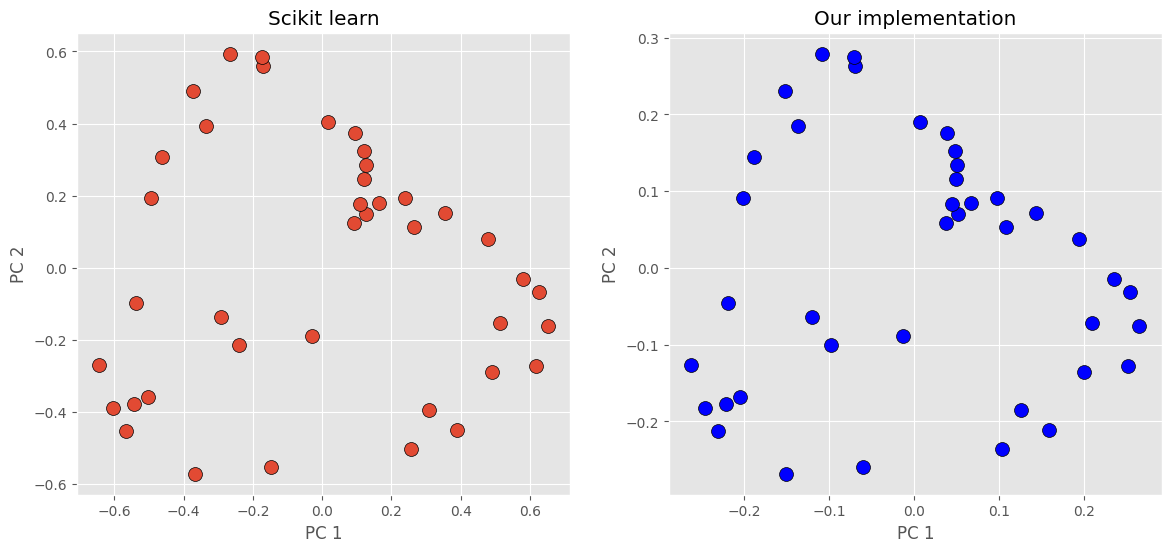

In [17]:
# Scikit-learn Kernel PCA
kpca1 = KernelPCA(n_components=3, kernel='rbf', gamma=0.01)
Xkpca1 = kpca1.fit_transform(Xstd)

# our implementation
Xkpca2 = my_ker_pca(Xstd)

with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    #plt.figure(figsize=(8,6))
    ax[0].scatter(Xkpca1[:,0], Xkpca1[:,1], s=100, edgecolors='k')   
    ax[0].set_xlabel('PC 1')
    ax[0].set_ylabel('PC 2')
    ax[0].set_title('Scikit learn')

    ax[1].scatter(Xkpca2[:,0], Xkpca2[:,1], s=100, facecolor = 'b', edgecolors='k')
    ax[1].set_xlabel('PC 1')
    ax[1].set_ylabel('PC 2')
    ax[1].set_title('Our implementation')
    plt.show()


### dot product

In [20]:
a = np.array([[1,2], [3,4]])
print("a:\n", a)
b = np.array([[2,2], [2,2]])

c = a.dot(b)

print("c:\n", c)  # dot product is equal to matrix multiplication

a:
 [[1 2]
 [3 4]]
c:
 [[ 6  6]
 [14 14]]


### sklearn svd_flip function - only to chekc this

In [ ]:
def copy_of_svd_flip(u, v, u_based_decision=True):

    """Sign correction to ensure deterministic output from SVD.
    Adjusts the columns of u and the rows of v such that the loadings in the
    columns in u that are largest in absolute value are always positive.
    Parameters
    ----------
    u : ndarray
        u and v are the output of `linalg.svd` or
        :func:`~sklearn.utils.extmath.randomized_svd`, with matching inner
        dimensions so one can compute `np.dot(u * s, v)`.
    v : ndarray
        u and v are the output of `linalg.svd` or
        :func:`~sklearn.utils.extmath.randomized_svd`, with matching inner
        dimensions so one can compute `np.dot(u * s, v)`.
        The input v should really be called vt to be consistent with scipy's
        output.
    u_based_decision : bool, default=True
        If True, use the columns of u as the basis for sign flipping.
        Otherwise, use the rows of v. The choice of which variable to base the
        decision on is generally algorithm dependent.
    Returns
    -------
    u_adjusted, v_adjusted : arrays with the same dimensions as the input.
    """
    if u_based_decision:
        # columns of u, rows of v
        max_abs_cols = np.argmax(np.abs(u), axis=0)
        signs = np.sign(u[max_abs_cols, range(u.shape[1])])
        u *= signs
        v *= signs[:, np.newaxis]
    else:
        # rows of v, columns of u
        max_abs_rows = np.argmax(np.abs(v), axis=1)
        signs = np.sign(v[range(v.shape[0]), max_abs_rows])
        u *= signs
        v *= signs[:, np.newaxis]
    return u, v
